In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scienceplots
import scipy.stats as stats
import scipy.optimize as optim

plt.style.use('science')

In [2]:
flat = pd.read_csv('./plaski copy.csv')
flat['d'] = (flat['d1'] + flat['d2'] + flat['d3'])/3
flat['Cd'] = flat['C']*flat['d']
flat

,przekladki,d1,d2,d3,C,d,Cd
0,1,4.35,4.32,4.36,118.4,4.343333,514.250667
1,2,7.04,6.81,6.80,71.2,6.883333,490.093333
2,3,10.93,10.65,10.66,48.3,10.746667,519.064000
3,4,14.75,14.50,14.54,37.7,14.596667,550.294333
4,5,16.60,16.65,16.36,31.3,16.536667,517.597667
5,1,3.63,3.85,3.63,121.2,3.703333,448.844000


In [3]:
quadratic = lambda x, a, b, c : a*x**2 + b*x**1 + c
cubic = lambda x, a, b, c,d : a*x**3 + b*x**2 + c*x**1 + d
f = quadratic

popt, pcov= optim.curve_fit(f, flat['d'], flat['Cd'])
perr = np.sqrt(np.diag(pcov))
print(perr,popt)

[ 0.75729381 15.29723467 62.38625812] [ -0.55516431  15.61830413 421.91266226]


(300.0, 600.0)

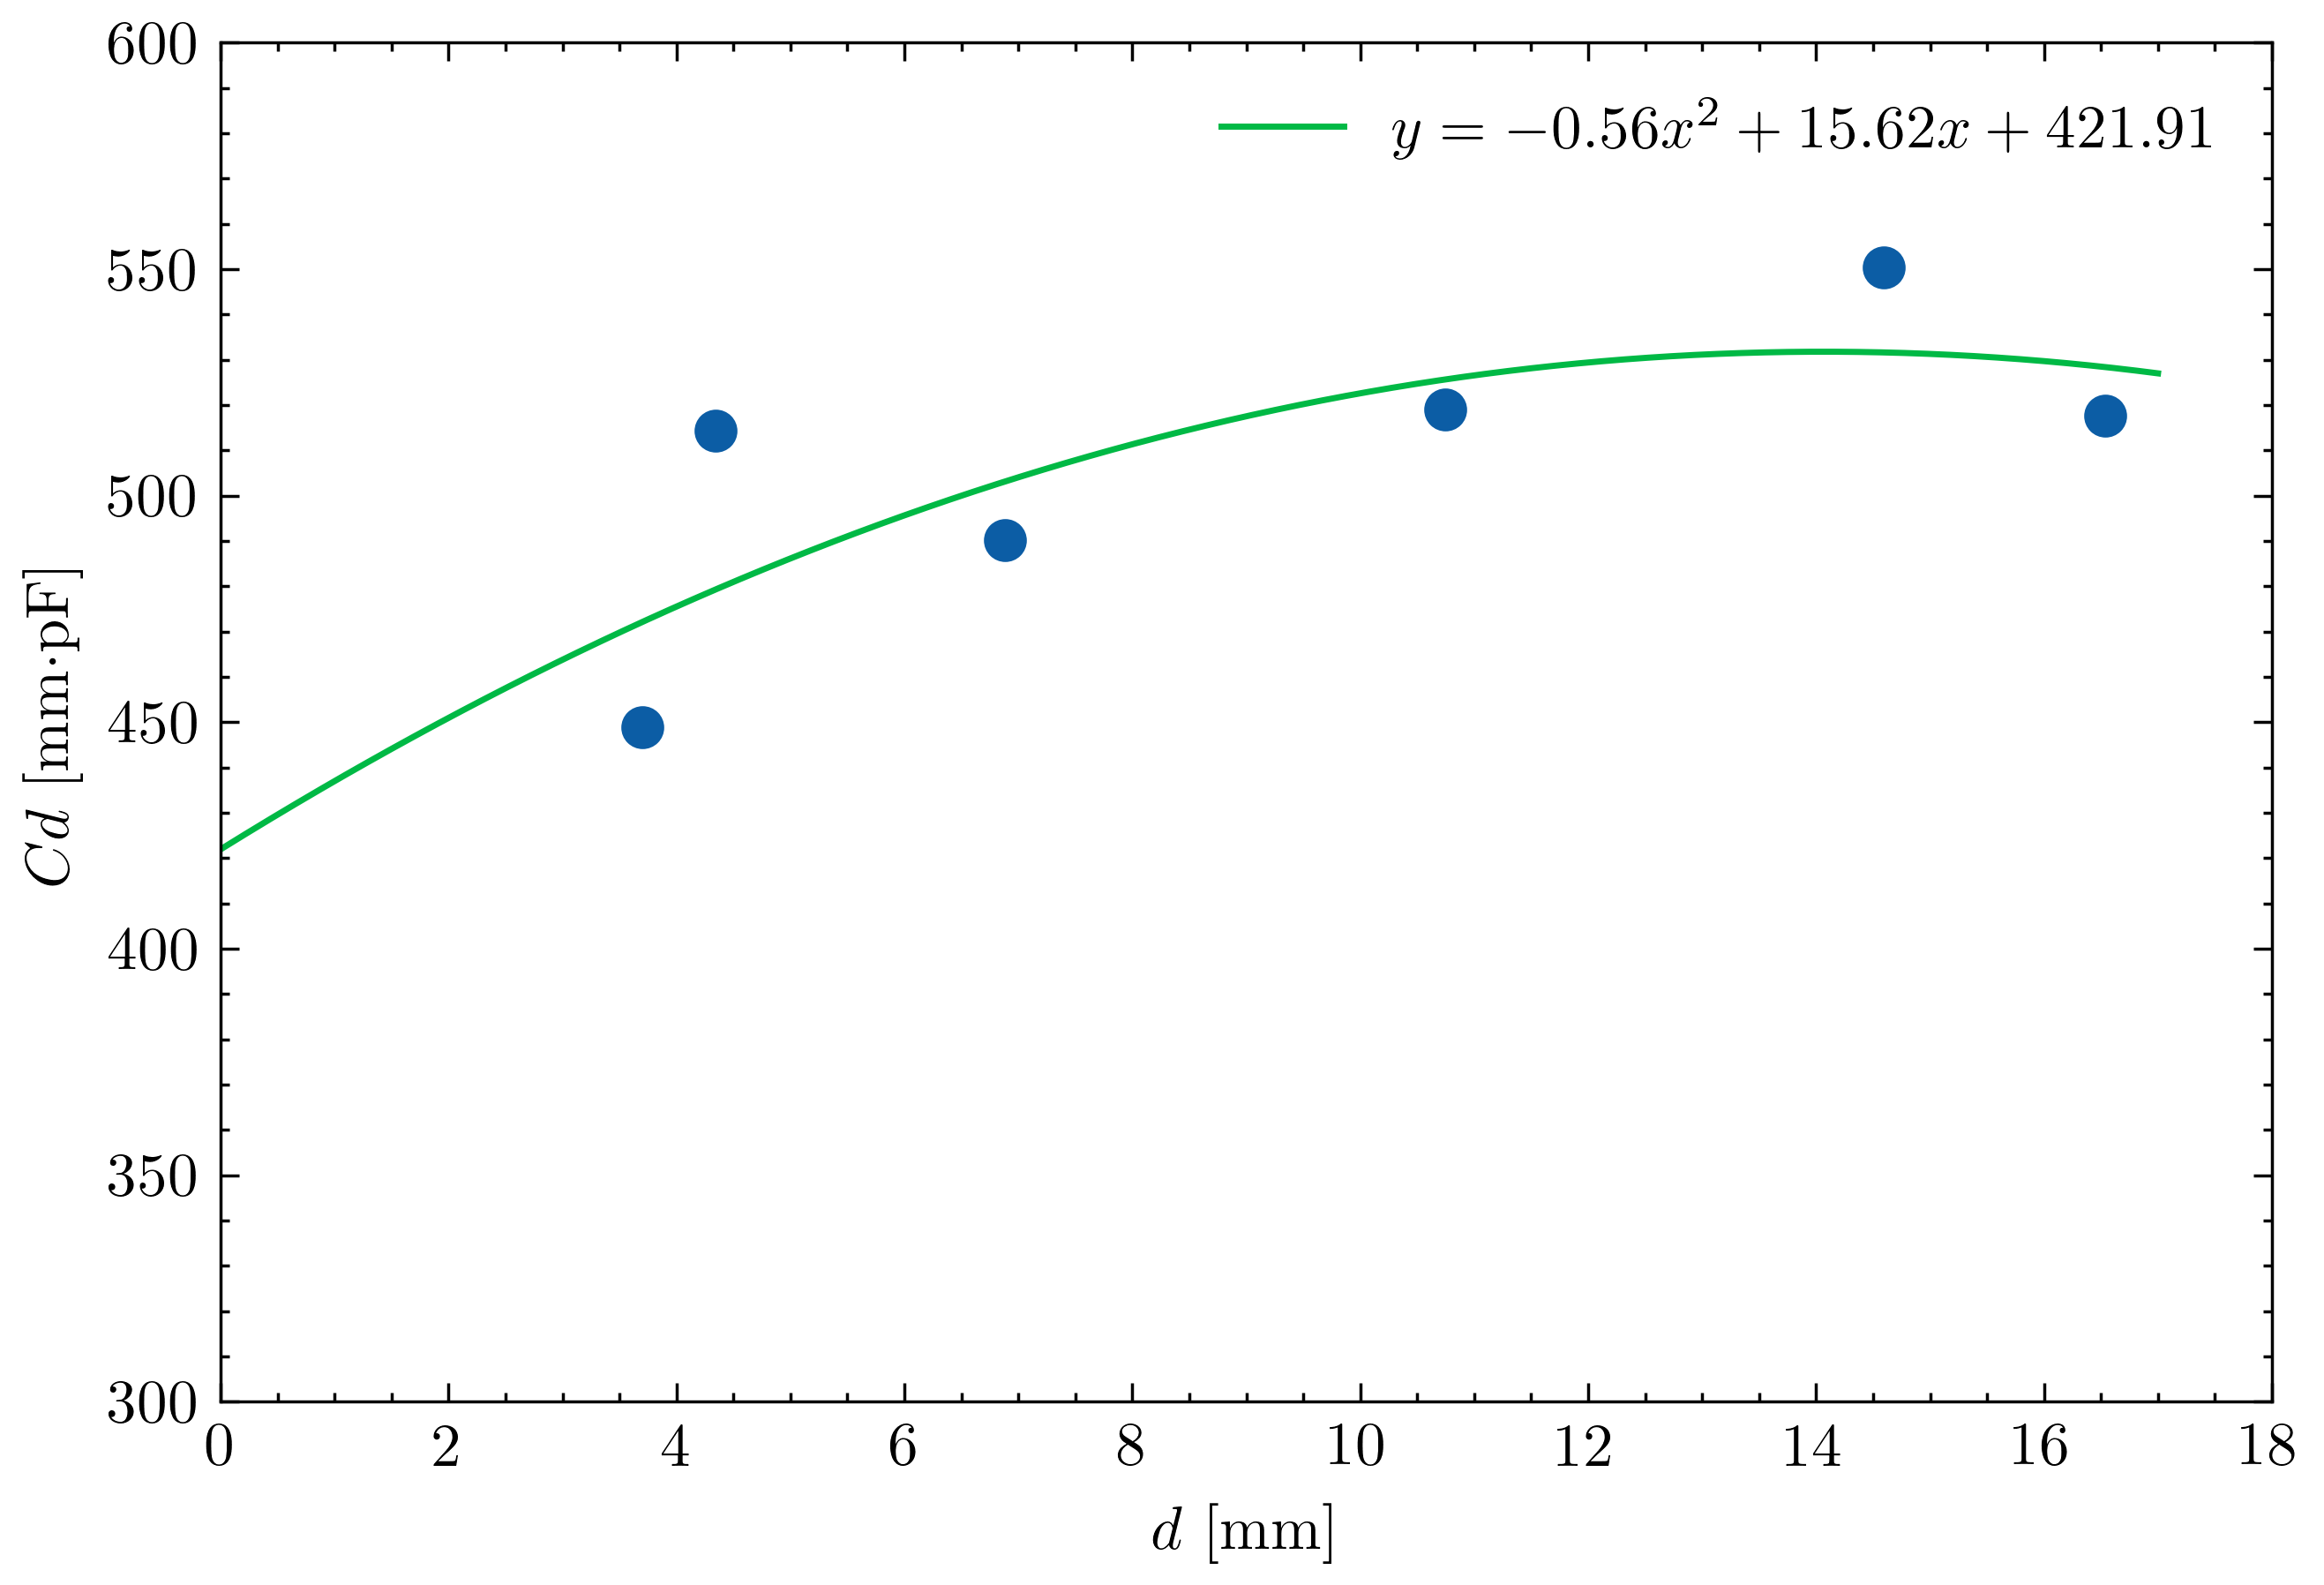

In [4]:
# creating a Cd(d) plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=500)

x = np.linspace(0, 17, 1000)
y = f(x, *popt)

ax.plot(x, y, label=rf'$y = {popt[0]:.2f}x^2{popt[1]:+.2f}x {popt[2]:+.2f}$', color='C1')
ax.scatter(flat['d'], flat['Cd'])

ax.set_xlabel(r'$d$ [mm]')
ax.set_ylabel(r'$Cd$ [mm$\cdot$pF]')
# ax.set_ylim(0, 600)
ax.legend()
ax.set_xlim(0.0, 18)
ax.set_ylim(300, 600)

In [5]:
P = {}
P['Cd'] = popt[-1]
P['u(Cd)'] = perr[-1]

P['Dp'] = 0.02005
P['D'] = 0.24
P['u(D)'] = 0.001

P['Sp'] = np.pi* (0.02005)**2 / 4
P['S'] = np.pi* (0.24)**2 / 4

P['er'] = 2.6
P['e0'] = (4/np.pi) * P['Cd'] / ( P['D']** 2 + 3* (P['er'] -1) * P['Dp']**2)
P['e0']

9024.011209883458

In [6]:
def caculate_uncertainty(P):
    first = 4/np.pi / P['D']**2 * P['u(Cd)']
    second = 8*P['Cd']/np.pi / P['D']**3 * P['u(D)']
    return np.sqrt(first**2 + second**2)
P['u(e0)'] = caculate_uncertainty(P)
P

{'Cd': 421.9126622553582,
 'u(Cd)': 62.38625812483937,
 'Dp': 0.02005,
 'D': 0.24,
 'u(D)': 0.001,
 'Sp': 0.00031573202518118265,
 'S': 0.04523893421169302,
 'er': 2.6,
 'e0': 9024.011209883458,
 'u(e0)': 1381.2273781431604}

In [9]:
di = pd.read_csv('./plaski_z_dielektrykami.csv')
di['S'] = np.pi * (0.24)**2 / 4

e0 = 8.854187817
di['er'] = di['C'] * di['d'] / e0 / di['S']*10**(-3)

fr'\varepsion_r = 
4,'

,material,d,C,S,er
0,drewno,9.71,201,0.045239,4.872526
1,pcv,3.11,374,0.045239,2.903828
2,pkesiglas,3.90,311,0.045239,3.028056


In [8]:
np.sqrt((4/np.pi/(240)**2 * P['u(Cd)'])**2 +  (8/np.pi/(240)**3 * P['Cd']*1)**2)

0.0013812273781431605